In [2]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [3]:
def synthetic_data(w, b, num_examples):  #@save
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [4]:
print('features:', features[0], '\nlabel:', labels[0])

features: tensor([-0.5215,  1.1670]) 
label: tensor([-0.8117])


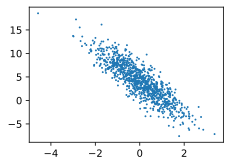

In [5]:
d2l.set_figsize()
# The semicolon is for displaying the plot only
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1);

In [6]:
def data_iter(batch_size: int, features, labels):
  indices = list(range(len(features)))
  random.shuffle(indices)
  for i in range(0, len(features), batch_size):
    batch_indices = torch.tensor(indices[i:min(i+batch_size, len(features))])
    yield features[batch_indices], labels[batch_indices]

In [7]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.8944, -0.5121],
        [-1.3043, -1.0210],
        [ 1.4086,  1.5761],
        [-1.2860,  0.7322],
        [ 0.6555, -1.8160],
        [ 1.1482, -0.9017],
        [-0.2886, -0.7381],
        [ 1.6092, -0.4241],
        [ 1.0336, -0.2656],
        [-0.0922,  1.5206]]) 
 tensor([[ 4.1715],
        [ 5.0760],
        [ 1.6517],
        [-0.8550],
        [11.6717],
        [ 9.5661],
        [ 6.1390],
        [ 8.8657],
        [ 7.1632],
        [-1.1613]])


In [8]:
w = torch.normal(0, 0.01, (2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [9]:
def linreg(X, w, b): #@save
  return torch.matmul(X, w) + b

In [10]:
def squared_loss(y_hat, y):
  return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [11]:
def sgd(params, lr, batch_size):  #@save
    """Minibatch stochastic gradient descent."""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [12]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
  for X, y in data_iter(batch_size, features, labels):
    l = loss(net(X, w, b), y)
    l.sum().backward()
    sgd([w, b], lr, batch_size)
  with torch.no_grad():
    train_l = loss(net(features, w, b), labels)
    print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')


epoch 1, loss 0.044691
epoch 2, loss 0.000190
epoch 3, loss 0.000050


In [13]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([ 0.0011, -0.0007], grad_fn=<SubBackward0>)
error in estimating b: tensor([0.0006], grad_fn=<RsubBackward1>)
